In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
data = pd.read_csv(r'C:\Users\Owner\Desktop\datasets\Google_Stock_Price_Train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1384 entries, 2013-01-02 to 2018-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1384 non-null   float64
 1   High       1384 non-null   float64
 2   Low        1384 non-null   float64
 3   Close      1384 non-null   float64
 4   Adj Close  1384 non-null   float64
 5   Volume     1384 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 75.7 KB


In [6]:
data['Close'] = data['Close'].replace(',', '', regex=True).astype(float)  # Removing commas and converting to float
scaler = MinMaxScaler()
data[['Close']] = scaler.fit_transform(data[['Close']]) 

In [8]:
# Create sequences
SEQ_LENGTH = 20
def create_sequences(data, seq_length):
    sequences = []
    targets = []

    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)
sequences, targets = create_sequences(data['Close'].values, SEQ_LENGTH)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(sequences,targets, test_size=0.2, shuffle=True)
# Build the model
model = Sequential([
SimpleRNN(50, input_shape=(SEQ_LENGTH, 1), activation='relu'),
Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/50
35/35 [==============================] - 14s 83ms/step - loss: 0.1811 - val_loss: 0.0164
Epoch 2/50
35/35 [==============================] - 1s 29ms/step - loss: 0.0027 - val_loss: 2.3198e-04
Epoch 3/50
35/35 [==============================] - 1s 27ms/step - loss: 2.1510e-04 - val_loss: 1.9472e-04
Epoch 4/50
35/35 [==============================] - 1s 27ms/step - loss: 2.1774e-04 - val_loss: 1.6673e-04
Epoch 5/50
35/35 [==============================] - 2s 60ms/step - loss: 2.2066e-04 - val_loss: 1.8689e-04
Epoch 6/50
35/35 [==============================] - 2s 59ms/step - loss: 2.0338e-04 - val_loss: 1.5677e-04
Epoch 7/50
35/35 [==============================] - 2s 64ms/step - loss: 2.2101e-04 - val_loss: 1.6464e-04
Epoch 8/50
35/35 [==============================] - 3s 86ms/step - loss: 1.9564e-04 - val_loss: 1.6732e-04
Epoch 9/50
35/35 [==============================] - 2s 49ms/step - loss: 2.0216e-04 - val_loss: 1.7207e-04
Epoch 10/50
35/35 [=============================

9/9 [==============================] - 2s 6ms/step


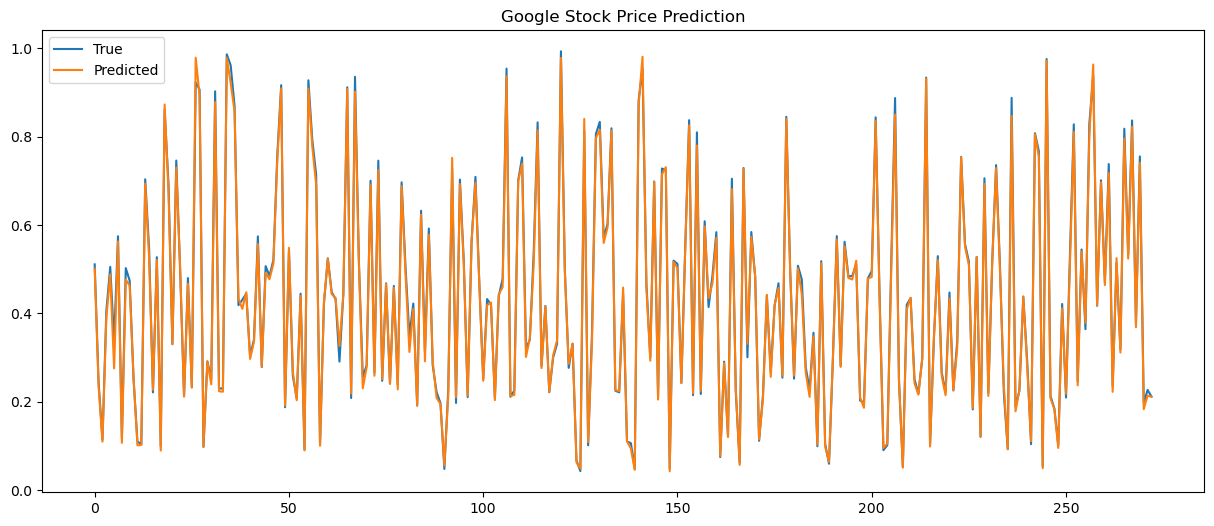

In [12]:
predictions = model.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()